# KNN Regression from Scratch

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading data into dataframe

cars = pd.read_csv("C:\\Users\\KAVIYA\\OneDrive\\Desktop\\Learning Materials\\IML\\cars.csv")

In [3]:
#Selecting the required columns from dataframe

cars2=cars[["MPG","Cylinders","Weight","Horsepower"]]

In [4]:
cars2

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140
...,...,...,...,...
401,27.0,4,2790,86
402,44.0,4,2130,52
403,32.0,4,2295,84
404,28.0,4,2625,79


In [5]:
#Removing the zeros from MPG

cars2=cars2[(cars2.MPG != 0)]
cars2

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140
...,...,...,...,...
401,27.0,4,2790,86
402,44.0,4,2130,52
403,32.0,4,2295,84
404,28.0,4,2625,79


In [6]:
#Removing zeros from Horsepower

cars2=cars2[(cars2.Horsepower != 0)]
cars2

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140
...,...,...,...,...
401,27.0,4,2790,86
402,44.0,4,2130,52
403,32.0,4,2295,84
404,28.0,4,2625,79


In [7]:
#Splitling the data as Predictors and Targets

carsX = cars2[["Cylinders","Weight","Horsepower"]] #Predictors variables
carsY=cars2[["MPG"]] #Target variables

In [8]:
carsX.head()

,Cylinders,Weight,Horsepower
0,8,3504,130
1,8,3693,165
2,8,3436,150
3,8,3433,150
4,8,3449,140


In [9]:
#Scaling predictors

def scaling(data):
    for col in data:
        data[col]=(data[col]-np.mean(data[col]))/np.std(data[col]) #z=(x-mean/std dev)
    return data


In [10]:
#function call for scaling
scaling(carsX)

C:\Users\KAVIYA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Cylinders,Weight,Horsepower
0,1.483947,0.620540,0.664133
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265
...,...,...,...
401,-0.864014,-0.221125,-0.480448
402,-0.864014,-0.999134,-1.364896
403,-0.864014,-0.804632,-0.532474
404,-0.864014,-0.415627,-0.662540


In [11]:
#Scaled predicator variables

carsX

,Cylinders,Weight,Horsepower
0,1.483947,0.620540,0.664133
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265
...,...,...,...
401,-0.864014,-0.221125,-0.480448
402,-0.864014,-0.999134,-1.364896
403,-0.864014,-0.804632,-0.532474
404,-0.864014,-0.415627,-0.662540


In [12]:
#Subsetting the scaled predictors as trainX and testX

trainX=carsX.iloc[1:406,:]
testX=carsX.iloc[0,:]  #Whose y is to be found   

In [13]:
trainX

,Cylinders,Weight,Horsepower
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265
5,1.483947,1.607198,2.433030
...,...,...,...
401,-0.864014,-0.221125,-0.480448
402,-0.864014,-0.999134,-1.364896
403,-0.864014,-0.804632,-0.532474
404,-0.864014,-0.415627,-0.662540


In [14]:
testX

Cylinders     1.483947
Weight        0.620540
Horsepower    0.664133
Name: 0, dtype: float64

In [15]:
#Target variable of the train set
trainY=carsY.iloc[1:406,:]
trainY.head()

,MPG
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0


In [16]:
#Euclidean distance
def euclidean(x1,x2):
    d=0
    for i in range(len(x1)):
        d=d+(x1[i]-x2[i])**2
    
    return np.sqrt(d)    


In [17]:
#KNN Algorithm
def knn(trainX, trainY, testX, k):        
    dist=[]
    #Calculating Euclidean distance between trainX and testX
    for i in range(0,len(trainX)):
        dist.append(euclidean(testX,trainX.iloc[i,:]))
    
    #Sorted list of distances between trainX and testX
    sort_dist= dist.copy()
    sort_dist.sort()
    
    index=[] #Initaializing an empty list 
    for i in range (0,k): #Loop based on the no of K neighbours
        indx=dist.index(sort_dist[i])  #Getting the index of the values corresponding to the distance
        index.append(indx)  #Appending the indicies to a list
        dist[indx]=-1   #To avoid duplicate entries changing the values of accessed entries as -1
        
    #Obtaining mean of the trainY values corresponding to the indices in the list    
    testY = np.mean(trainY.iloc[index])   
    #print("Predicted value of Y for %dNN is %f" %(k,testY)) 
    return testY #Return testY to plot graph

#### Predicted value of y for specified k value

In [18]:
#function call for KNN
knn(trainX, trainY, testX,30)

MPG    16.963333
dtype: float64

#### Predicted values of Y for '1 to n' k values

In [19]:
#Values of Y for varying K neighbours
k=1
y=[]  #list to get values of y
Kn=[] #list to get values of k
for i in range(30): #K is specificed as 0 to 30
    a=knn(trainX, trainY, testX,k) 
    y.append(a) #Values of predicted Y
    Kn.append(k) #K values appended in list
    k=k+1

In [20]:
#Calculating error- Actual value vs Predicted Y values

for i in range(len(y)):
    y[i]=18-y[i] #Actual value of y - Predicted value of y
print(y)


[MPG   -1.2
dtype: float64, MPG   -1.7
dtype: float64, MPG   -1.0
dtype: float64, MPG   -0.5
dtype: float64, MPG   -0.68
dtype: float64, MPG    0.266667
dtype: float64, MPG    0.371429
dtype: float64, MPG    0.175
dtype: float64, MPG    0.133333
dtype: float64, MPG    0.11
dtype: float64, MPG    0.554545
dtype: float64, MPG    0.091667
dtype: float64, MPG    0.084615
dtype: float64, MPG    0.221429
dtype: float64, MPG    0.406667
dtype: float64, MPG    0.2625
dtype: float64, MPG    0.305882
dtype: float64, MPG    0.511111
dtype: float64, MPG    0.563158
dtype: float64, MPG    0.56
dtype: float64, MPG    0.771429
dtype: float64, MPG    0.85
dtype: float64, MPG    0.943478
dtype: float64, MPG    1.029167
dtype: float64, MPG    0.908
dtype: float64, MPG    1.026923
dtype: float64, MPG    1.174074
dtype: float64, MPG    1.239286
dtype: float64, MPG    1.368966
dtype: float64, MPG    1.036667
dtype: float64]


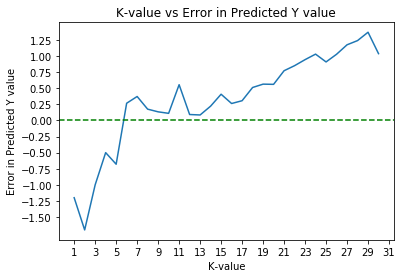

<Figure size 720x864 with 0 Axes>

In [21]:
#Plotting graph - K-value vs Error in Predicted Y_value

plt.plot(Kn,y) #X axis as K value and Y axis as error value
plt.title('K-value vs Error in Predicted Y value')
plt.xlabel('K-value')
plt.ylabel('Error in Predicted Y value')
plt.axhline(y=0, color='g', linestyle='--') # Line indicating 0 error
plt.yticks(np.arange(-1.5,1.5,0.25))
plt.xticks(np.arange(1,32,2))
plt.figure(figsize=(10,12))
plt.show()

**NOTE**: When k=13, line is very close to 0 indicating minimum error